<a href="https://colab.research.google.com/github/ydv1412/airline_review_classification/blob/main/airline_review_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Airline Review CLassification </u></b>

## <b> Problem Description </b>

### Airways is a premium and fast mode of travel. A decent portion of population nowadays uses airways. For airline giants it is important to know wheather a passenger likes their services or not. It will be very informative for them if they can analyse reviews and know if a traveller is going to recommend their flight to others or not. Analysing reviews could also tell them what are the important servises or features travellers want most.

## <b> Data Description </b>

### <b> The dataset contains names (airline , aircraft , author) ,dates ( review , flown ) , routs, reviews, recommended , cabin_type , traveller_type  and ratings ( overall , food_bev , seat_comfort , cabin_service , entertainment , ground_service , value_for_money ) information.</b>


### <b>Attribute Information: </b>

* ### Airline - Airline Name
* ### Aircraft - Name of aircraft
* ### Author - Person who has written review
* ### Review_date - Date of review
* ### Flown_date - Date of flight
* ### Routs - Rout taken by aircraft
* ### Review - Review text
* ### Recommended - Whether a person recommends the flight or not
* ### Cabin_type - Type of cabin
* ### Traveller_type - Type of traveller
* ### Overall - Overall rating of flight (0-10)
* ### Food_bev - Food and Beverage rating (0-5)
* ### Seat_comfort - Seat comfort rating  (0-5)
* ### Cabin_service - Cabin_service rating  (0-5)
* ### Entertainment - entertainment rating  (0-5)
* ### Ground_service - Ground Service rating  (0-5)
* ### Value_for_money - Value for money rating  (0-5)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
import string
import re
from tqdm import tqdm
from bs4 import BeautifulSoup
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,confusion_matrix
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

In [4]:
import nltk
nltk.download('stopwords')                            ### importing english stopwords 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
df = pd.read_excel('/content/drive/MyDrive/capstone project /supervised_learning_classification/data_airline_review_classification/data_airline_reviews.xlsx' , 
                skiprows = lambda x: x%2!=0 )     # skipping odd rows

In [6]:
df.head(5)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65947 entries, 0 to 65946
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          52435 non-null  object 
 1   overall          51145 non-null  float64
 2   author           52435 non-null  object 
 3   review_date      52435 non-null  object 
 4   customer_review  52435 non-null  object 
 5   aircraft         17141 non-null  object 
 6   traveller_type   31293 non-null  object 
 7   cabin            50909 non-null  object 
 8   route            31270 non-null  object 
 9   date_flown       31192 non-null  object 
 10  seat_comfort     48882 non-null  float64
 11  cabin_service    48906 non-null  float64
 12  food_bev         44338 non-null  float64
 13  entertainment    37692 non-null  float64
 14  ground_service   31006 non-null  float64
 15  value_for_money  50938 non-null  float64
 16  recommended      51195 non-null  object 
dtypes: float64(7

The dataset consists of 65947 rows and 17 columns out of which seven are numerical ten are string objects

<b> Exploratory Data Analysis

Let's see which airlines has highest yes recommendation and which flights has highest no recommendations

In [8]:
df_2 = df.groupby(by = ['airline' ,'recommended']).size()                           ### getting groupby size 
df_3 = df.groupby(by = ['airline','recommended']).count().reset_index()             ### resetting index
df_3 = pd.DataFrame(data = df_3 , columns = ['airline' , 'recommended'])            ## creating df
df_3['counts'] = list(df_2)                                                          ## adding count column

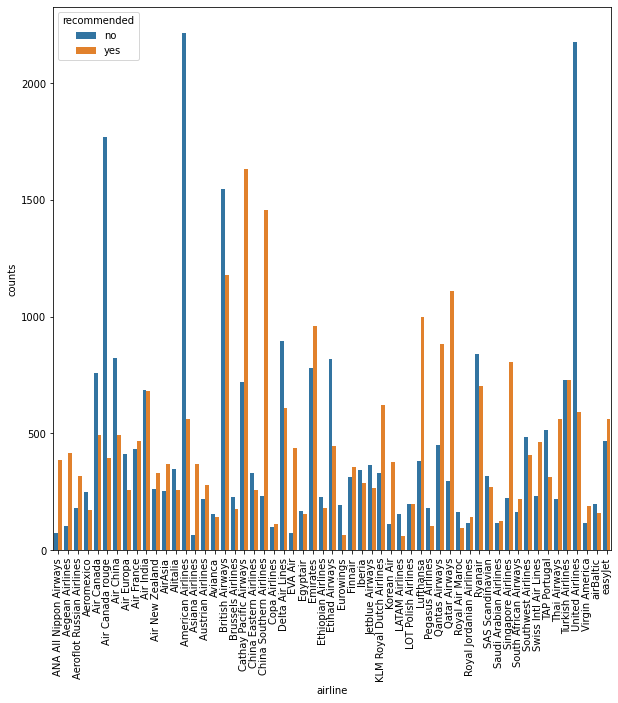

In [9]:
plt.figure(figsize = (10,10))                                                         ### barplot of airline counts

sns.barplot(data = df_3 , x='airline',y = 'counts' ,hue = 'recommended')
plt.xticks(rotation = 90)
plt.show()

Observation:
* American Airlines and United Airlines have the highest number of no recommendations.
*Cathay Pacific and China Southern airlines have the highest number of yes recommendations.

Let's see the yes recommendation rates for all the airlines which has received more than ten reviews as if an airline has taken only one review and recommendation is yes then its recommendation rate will be highest.

In [10]:
df_approval = df_3.groupby(by = 'airline')['counts'].sum().reset_index(name = 'total')    #### counting total number of flghts per airline
df_approval = df_approval[df_approval['total']>10]
t = list(df_3[df_3['recommended'] == 'yes']['counts'])                                    #### counting number of reviews with yes recommendation
df_approval['yes_count'] = t                                                              #### creating a yes_count column
df_approval['approval_rate'] = df_approval['yes_count']/df_approval['total']              ### finding yes recommendation rate per airline

[]

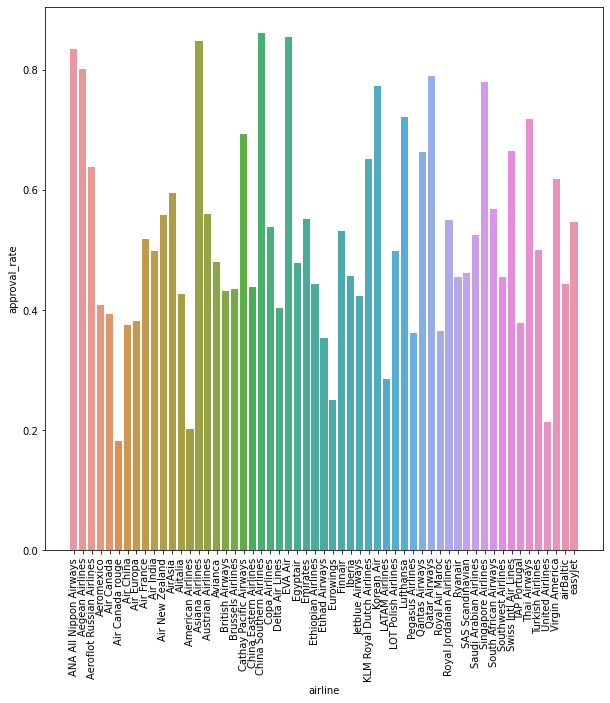

In [11]:
plt.figure(figsize=(10,10))                                                               ### plotting barplot of airline per approval_rate

sns.barplot(data = df_approval , x = 'airline' , y = 'approval_rate')
plt.xticks(rotation = 90)
plt.plot()

Observation:
* For China Southern Airlines, Eva Air and Asiana Airlines yes recommendation rate is maximum.
* For Air Canada and American Airlines yes recommendation rate is minimum

Let's see which airlines has received maximum number of reviews and which airlines has received minimum number of reviews

[]

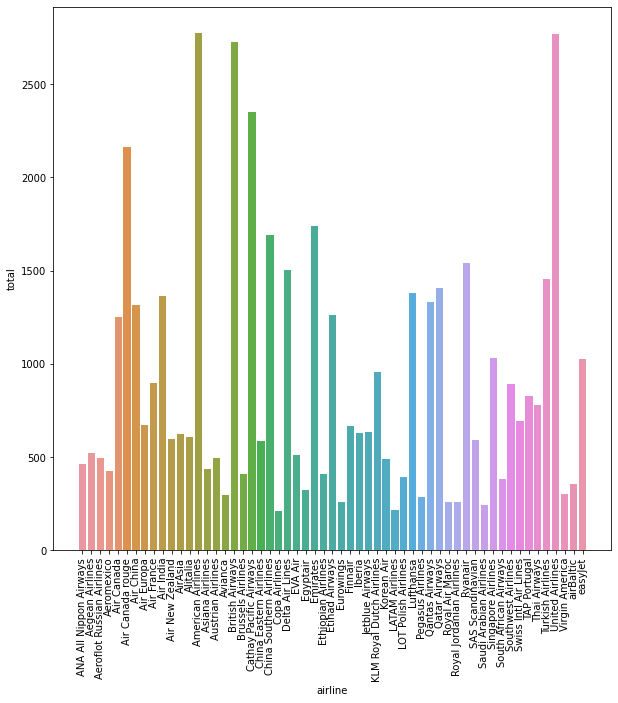

In [12]:
plt.figure(figsize=(10,10))

sns.barplot(data = df_approval , x = 'airline' , y = 'total')                   ### barplot of airline per total number of reviews
plt.xticks(rotation = 90)
plt.plot()

Observation
* American airlines followed by united airlines has received highest number of reviews. 
* Copa Airlines followed by LATAM Airlines has received least number of reviews.

Let's replace recommended categories yes and no with 1 and 0 respectively.

In [13]:
df['recommended'] = df['recommended'].apply(lambda x: 1 if x=='yes' else 0)              ### encoding recommendation with 1 and 0

Now let's see how the recommendation is changing with other numerical features. 

In [14]:
columns = ['overall' , 'seat_comfort' , 'cabin_service' , 'food_bev' , 'entertainment' , 'ground_service' , 'value_for_money' , 'recommended']          ### listing numerical columns

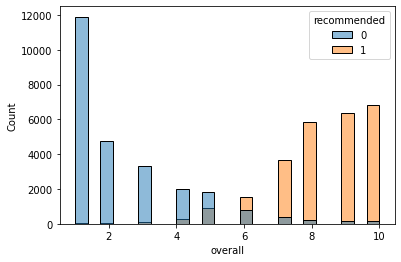

In [15]:
sns.histplot(data = df , x = 'overall' , hue = 'recommended')                                                     ### histplot between overall and recommended

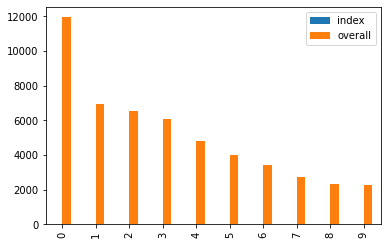

In [16]:
df['overall'].value_counts().reset_index().plot(kind = 'bar')                           ### barplot for overall feature

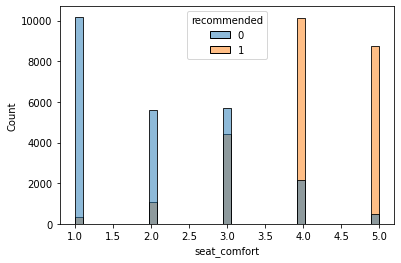

In [17]:
sns.histplot(data = df , x = 'seat_comfort' , hue = 'recommended')                  ### histplot between seat_comfort and recommended

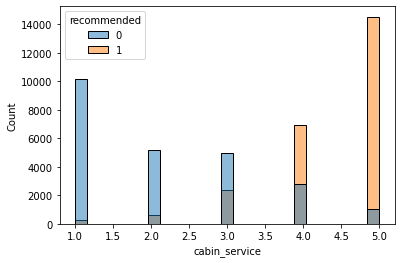

In [18]:
sns.histplot(data = df , x = 'cabin_service' , hue = 'recommended')                ### histplot between cabin_service and recommended

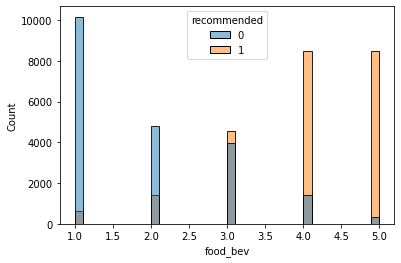

In [19]:
sns.histplot(data = df , x = 'food_bev' , hue = 'recommended')                     ### histplot between food_bev and recommended

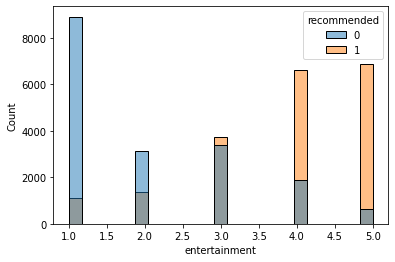

In [20]:
sns.histplot(data = df , x = 'entertainment' , hue = 'recommended')                   ### histplot between entertainment and recommended

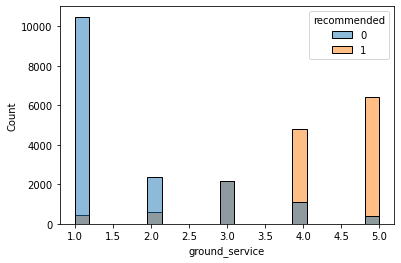

In [21]:
sns.histplot(data = df , x = 'ground_service' , hue = 'recommended')                ### histplot between ground_service and recommended

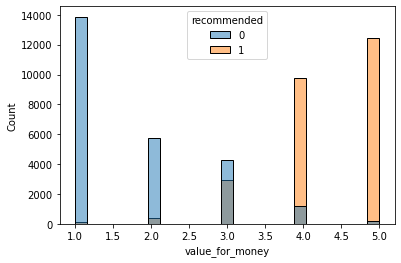

In [22]:
sns.histplot(data = df , x = 'value_for_money' , hue = 'recommended')                   ### histplot between value_for_money and recommended

Let's see the distribution of overall feature

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


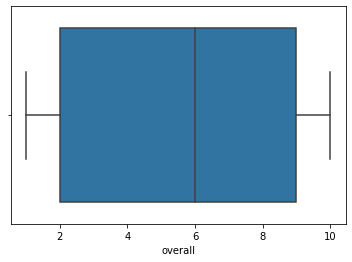

In [23]:
sns.boxplot(df['overall'])                                             ### boxplot for overall

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


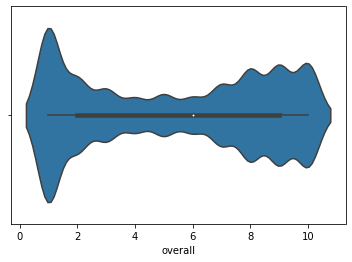

In [24]:
sns.violinplot(df['overall'])                           ### violin plot for overall

Observation:
* For overall values >= 6 recommendations are mostly yes.
* For overall value <6 recommendations are mostly No.
* Mean of the overall values is approximately 6
* For seat_comfort,food_bev,ground_service,entertainment , value_for_money and cabin service values <=2 recommendation is mostly no and for values >=4 recommendation is mostly yes.
* For most of the reviews overall rating is 0.



Let's see how many unique aircrafts do we have

In [25]:
len(df['aircraft'].unique())

1930

As there are 1930 unique aircrafts let's see top ten and bottom ten aircrafts with respect to the rate of recommendation. The constraint is the aircraft must have received more than 10 reviews.

In [26]:
df_2 = df.groupby(by = ['aircraft' ,'recommended']).size()                                      ### getting groupby size of aircrafts
df_3 = df.groupby(by = ['aircraft','recommended']).count().reset_index()                        ### resetting index
df_3 = pd.DataFrame(data = df_3 , columns = ['aircraft' , 'recommended'])                       ### creating new dataframe
df_3['counts'] = list(df_2)                                                                     ### creating new column
df_3.sort_values(by = 'counts' , ascending = False , inplace = True)       

df_aircraft = df_3.groupby(by = 'aircraft')['counts'].sum().reset_index(name = 'total')           ### groupping by aircrafts and summing no of flights
df_aircraft['yes_recommended'] = np.zeros(df_aircraft.shape[0])

for i in range(df_aircraft.shape[0]):
  aircraft_name = df_aircraft['aircraft'][i]
  m = df_3[df_3['aircraft']==aircraft_name]
  try:  
    df_aircraft['yes_recommended'][i] = list(m[m['recommended']==1]['counts'])[0]                 ### counting yes recommendation from main dataset
  except:
    pass

df_aircraft = df_aircraft[df_aircraft['total']>10]
df_aircraft['yes_recommendation_rate'] = df_aircraft['yes_recommended']/df_aircraft['total']                ### calculating recommendation rate for each aircrafts

bottom_ten_aircrafts = df_aircraft.sort_values(by = 'yes_recommendation_rate' , ascending = True)[:20]     ### top ten aircrafts with respect to the recommendation rate
top_ten_aircrafts = df_aircraft.sort_values(by = 'yes_recommendation_rate' , ascending = False)[:20]       ### bottom ten aircrafts with respect to the recommendation rate



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


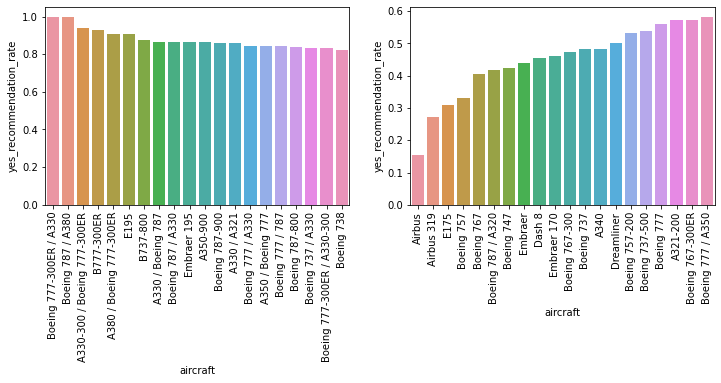

In [27]:
plt.figure(figsize = (12,8))
plt.subplot(221)  
sns.barplot(data = top_ten_aircrafts , x = 'aircraft' , y = 'yes_recommendation_rate')                      ### top 10 aircrafts
plt.xticks(rotation = 90)

plt.subplot(222)  
sns.barplot(data = bottom_ten_aircrafts , x = 'aircraft' , y = 'yes_recommendation_rate')                   ### botom 10 aircrafts
plt.xticks(rotation = 90)

plt.show()

Observation:
* Boeing 777-300ER/ A330 and Boeing 787 / A380 has the highest yes recommendation rate of 1.
* Airbus followed by Airbus 319 has the lowest recommendation rate of approximately 1.5 and 2.7 respectively. 

Now let's analyse different categorical features we have

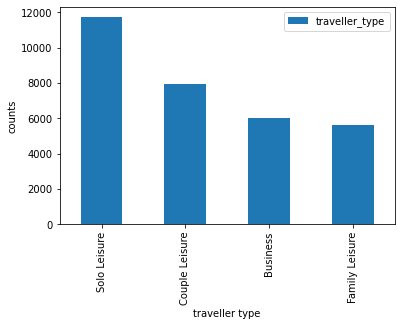

In [28]:
df['traveller_type'].value_counts().reset_index().plot(kind = 'bar'  , x = 'index')                #### count of different traveller type
plt.xlabel("traveller type")
plt.ylabel("counts")
plt.show()         

Observation:
* Most of the travellers are Solo Leisure type.
* Family Leisure type travellers are least.

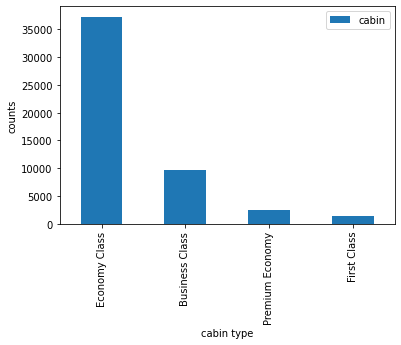

In [29]:
df['cabin'].value_counts().reset_index().plot(kind = 'bar' , x = 'index')                          #### count of different cabin type
plt.xlabel("cabin type")
plt.ylabel('counts')
plt.show()

Observation:
* Most of the travellers take Economy class.
* Least travellers take First class.

Let's see if our dataset is balanced

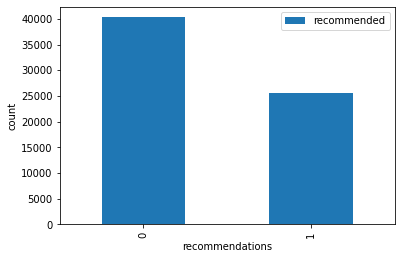

In [30]:
df['recommended'].value_counts().reset_index().plot(kind = 'bar' , x= 'index')                           ### count of yes and no recommendation
plt.xlabel("recommendations")
plt.ylabel('count')
plt.show()

Observation
* Our dataset is not balanced as 40000 of the reviews have YES recommendation and around 25000 have NO recommendation.

Let's see pair plot between all the numerical features

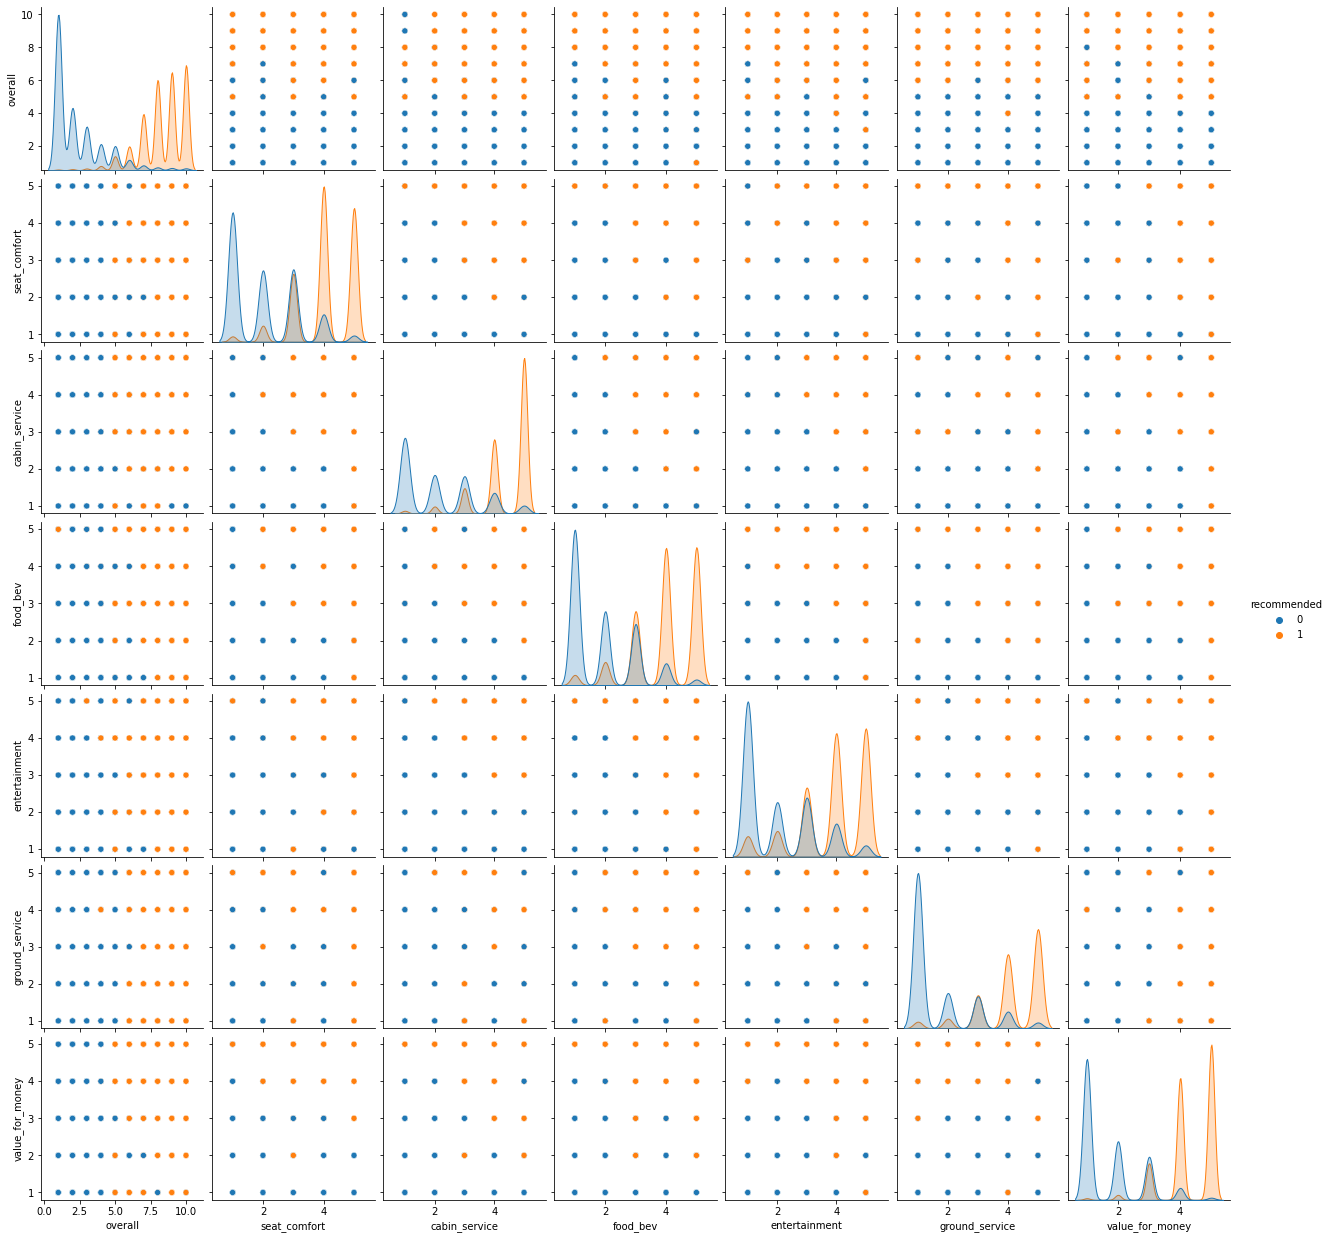

In [ ]:
sns.pairplot(data = df[columns] , hue = 'recommended')                                           ### plotting scatter plot

observation
* All the features have overlapping PDF's for yes and no recommendations except overall which has less overlapping.
* Here we can say that overall with ground_service could give a nice decision boundary separator.

<b> Correlation


Let's see how all the features are correlated with our target variable.

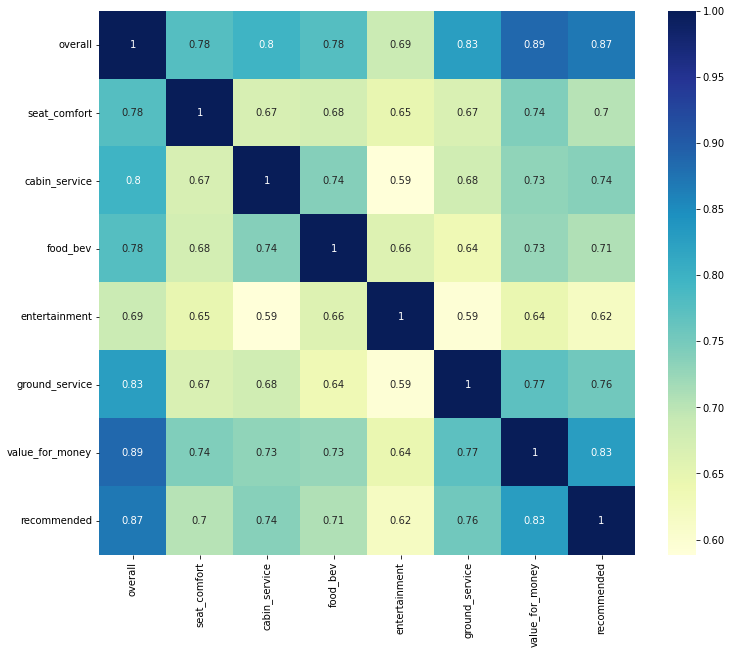

In [31]:
plt.figure(figsize = (12,10))
dataplot = sns.heatmap(df[columns].corr(), cmap="YlGnBu", annot=True)                 ### plotting correlation matrix
  
# displaying heatmap
plt.show()

observation
* We can see that recommended feature is less or more correlated with all the numerical features.
* Recommended is highly correlated with value for money and overall.


<b> Let's see correlation of categorical variables using chi_square 

In [32]:
columns = ['traveller_type','cabin','recommended']                                                                                          ### listing categorical columns
df_2 = df[columns].copy()                                                                
df_2['traveller_type'] = df_2['traveller_type'].map({'Business':3 , 'Family Leisure':2 ,'Solo Leisure':0 , 'Couple Leisure':1})             ## converting categories to integers
df_2['cabin'] = df_2['cabin'].map({'Economy Class':0 , 'Premium Economy':1 ,'Business Class':2 , 'First Class':3})

Text(0.5, 1.0, 'Chi-Square Test Results')

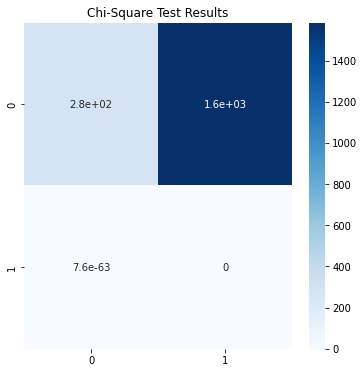

In [33]:
df_3 = df_2[columns].dropna()                                                                          #### dropping null values 
x = df_3.iloc[:,:-1]
y = df_3.iloc[:,-1]
fscore = chi2(x,y)                                                                                     #### chi_sq
plt.figure(figsize = (6,6))
sns.heatmap(fscore, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')

Observation
* For both traveller_type and cabin p value is less than 0.05 hence they both have some correlation with recommended feature.

<b> Handling null values

Let's see if our dataset contains null values

In [34]:
percent_missing = df.isnull().sum() * 100 / len(df)                                             ### percentage of null values each column has
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})

missing_value_df

,column_name,percent_missing
airline,airline,20.489181
overall,overall,22.445297
author,author,20.489181
review_date,review_date,20.489181
customer_review,customer_review,20.489181
aircraft,aircraft,74.007915
traveller_type,traveller_type,52.548258
cabin,cabin,22.803160
route,route,52.583135
date_flown,date_flown,52.701412


Observation:
* We can see that out dataset contains large number of null values.We will drop the columns which are less usefull like date_flown, route, review_date and author.
* We will also dropping Aircraft column because it contains over 74 percent of null values.

In [35]:
df.drop(['author' , 'review_date' , 'aircraft' , 'route' , 'date_flown'] , inplace = True , axis = 1)                           ### dropping columns
df['traveller_type'] = df['traveller_type'].map({'Business':3 , 'Family Leisure':2 ,'Solo Leisure':0 , 'Couple Leisure':1})     ### encoding 
df['cabin'] = df['cabin'].map({'Economy Class':0 , 'Premium Economy':1 ,'Business Class':2 , 'First Class':3})                  ### encoding

Airline has many categories so insted of replacing them with integer values let's one hot encode it.

In [36]:
airlines_dummy = pd.get_dummies(df['airline'])                                                                             ### one hot encoding airline feature 
df.drop(['airline'] ,axis = 1 , inplace = True)                                                                            ### dropping airline column
df = pd.merge(left = df , right = airlines_dummy , how = 'left' , left_index = True , right_index = True)                   ## merging both dataset   
print(df.shape)
df.head(5)

(65947, 68)


,overall,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,...,South African Airways,Southwest Airlines,Swiss Intl Air Lines,TAP Portugal,Thai Airways,Turkish Airlines,United Airlines,Virgin America,airBaltic,easyJet
0,7.0,âœ… Trip Verified | London to Izmir via Istanb...,3.0,0.0,4.0,5.0,4.0,4.0,2.0,4.0,...,0,0,0,0,0,1,0,0,0,0
1,2.0,âœ… Trip Verified | Istanbul to Bucharest. We ...,2.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0
2,3.0,âœ… Trip Verified | Rome to Prishtina via Ista...,3.0,0.0,1.0,4.0,1.0,3.0,1.0,2.0,...,0,0,0,0,0,1,0,0,0,0
3,10.0,âœ… Trip Verified | Flew on Turkish Airlines I...,0.0,0.0,4.0,5.0,5.0,5.0,5.0,5.0,...,0,0,0,0,0,1,0,0,0,0
4,1.0,âœ… Trip Verified | Mumbai to Dublin via Istan...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0


Now let's impute null with most frequent ones.

In [37]:
imp = SimpleImputer(strategy="most_frequent")              ### using SimpleImputer to impute missing or NaN values with most_frequent ones
df_array = imp.fit_transform(df)                           ### simple imputer returns 2darray
df_array.shape

(65947, 68)

In [38]:
columns = df.columns                                              ## listing columns
new_df = pd.DataFrame(df_array , columns = columns)               ### converting array top dataframe

<b> Vectorizing review feature

Let's perform vectorization on review feature

In [39]:
stop_words = stopwords.words('english')                                                   #### english stopwords

In [40]:
def denocrate(phase):                                                                    #### function for replacing "'t","\ll" etc with not ,will
    phase = re.sub(r"\'t"," not ",phase)
    phase = re.sub(r"\'ll", " will ",phase)
    phase = re.sub(r"\'re" , " are " , phase)
    phase = re.sub(r"\'d" , " would " , phase)
    phase = re.sub(r"\'m" , " am " , phase)
    phase = re.sub(r"\'ve" , " have " , phase)
    phase = re.sub(r"\'s" , " is " , phase)
    return phase

In [41]:
# texts = []
# for text in tqdm(new_df["customer_review"]):
#     soup = BeautifulSoup(text , "lxml")                                                           ###### remove html tags
#     text = soup.get_text()
#     text = re.sub(r"http\S+", "", text)                                                           #### remove links 
#     text = denocrate(text)
#     text = re.sub("\S*\d\S*", "", text).strip()                                                   #### removes wods which have deciml numbers
#     text = re.sub('[^A-Za-z]+', " ", text).strip()                                                ####  removes special characters
#     text = text.lower()
#     text = ' '.join(word.lower() for word in text.split() if word.lower() not in stop_words)      ## these two lines which removs 
#     ##text = ' '.join(stem.stem(word) for word in text.split() if len(word)>2)stopwords and stemmerise the words are removed because of tfidf and w2v
#     text = ' '.join(word for word in text.split() if len(word)>2)
#     texts.append(text)

In [42]:
def clean_text(corpus):
  texts = []
  for text in tqdm(corpus):
    soup = BeautifulSoup(text , "lxml")                                                           ###### remove html tags
    text = soup.get_text()
    text = re.sub(r"http\S+", "", text)                                                           #### remove links 
    text = denocrate(text)
    text = re.sub("\S*\d\S*", "", text).strip()                                                   #### removes wods which have deciml numbers
    text = re.sub('[^A-Za-z]+', " ", text).strip()                                                ####  removes special characters
    text = text.lower()
    text = ' '.join(word.lower() for word in text.split() if word.lower() not in stop_words)      ## these two lines which removs 
    ##text = ' '.join(stem.stem(word) for word in text.split() if len(word)>2)stopwords and stemmerise the words are removed because of tfidf and w2v
    text = ' '.join(word for word in text.split() if len(word)>2)
    texts.append(text)
  return texts

In [43]:
new_df['processed_review'] = clean_text(new_df['customer_review'])

100%|██████████| 65947/65947 [01:25<00:00, 772.13it/s] 


In [44]:
new_df.drop(['customer_review'] , axis = 1 , inplace = True)                                 ### dropping non processed review

In [45]:
new_df['processed_review'][0]                                                                ### viewing one sample

'trip verified london izmir via istanbul first time flown found good air cabin crew planes food nice great ground ground staff call centre computer systems flight lhr delayed missed connection istanbul ground staff speak english given contradictory instructions could speak little english eventually got flight izmir three hours later easy process made worse vast distances one walk gates cavernous new airport also phoned call centre based ukraine pay extra way extra leg room seats however departure times kept changing seats kept changing return leg london istanbul given extra leg room seat luckily spare exit row seat cabin crew sorted overall think cabin crew planes good ground staff call centre staff need better training need better computer systems software work'

Let's use bag of words algorithm to vectorize our text reviews

In [46]:
vectorizer = CountVectorizer(max_df = 0.9,min_df = 1000)                                     ### using bag of words to vectorizing processed_reviews
X = vectorizer.fit_transform(new_df['processed_review'])

In [47]:
X.shape                                                                                     ### shape of vectorized data

(65947, 641)

We have 641 features after vectorization. Let's see what are these features 

In [48]:
vectorizer.get_feature_names()                                                               #### important features

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['able',
 'absolutely',
 'abu',
 'access',
 'actually',
 'additional',
 'agent',
 'ago',
 'ahead',
 'air',
 'aircraft',
 'airline',
 'airlines',
 'airplane',
 'airport',
 'airways',
 'aisle',
 'allowed',
 'almost',
 'already',
 'also',
 'although',
 'always',
 'american',
 'amsterdam',
 'angeles',
 'announcements',
 'another',
 'anyone',
 'anything',
 'area',
 'around',
 'arrival',
 'arrive',
 'arrived',
 'arriving',
 'ask',
 'asked',
 'asking',
 'attendant',
 'attendants',
 'attentive',
 'attitude',
 'available',
 'average',
 'avoid',
 'away',
 'awful',
 'back',
 'bad',
 'bag',
 'baggage',
 'bags',
 'bangkok',
 'beach',
 'bed',
 'behind',
 'beijing',
 'best',
 'better',
 'beverages',
 'big',
 'bit',
 'bkk',
 'board',
 'boarded',
 'boarding',
 'boeing',
 'book',
 'booked',
 'booking',
 'breakfast',
 'british',
 'brought',
 'bus',
 'business',
 'buy',
 'cabin',
 'call',
 'called',
 'came',
 'canada',
 'cancelled',
 'cannot',
 'captain',
 'card',
 'care',
 'carrier',
 'carriers',
 'carry

Let's create a dictionary for different features and indexes which we will use in determining feature importance.

In [ ]:
# value = vectorizer.get_feature_names()
# dictionary ={i:value[i] for i in range(len(value))}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Let's replace our processed_review feature with these bag of words vector

In [49]:
bag_of_words = vectorizer.transform(new_df['processed_review']).toarray()                                  ## vectorizing

In [50]:
# new_df.drop(['customer_review'] , axis = 1 , inplace = True)

In [51]:
new_df.drop(['processed_review'] , axis = 1 , inplace = True)                                                                 ## dropping processed review column
bag_of_words = pd.DataFrame(bag_of_words , columns = [vectorizer.get_feature_names()])                                            ## converting bow to dataframe
new_df = pd.merge(left = new_df , right = bag_of_words , how = 'left' , left_index = True , right_index = True)               ### merginging both datasets on index

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# new_df2 = new_df.drop(['processed_review' ] , axis = 1)

In [52]:
new_df.columns.values

array(['overall', 'traveller_type', 'cabin', 'seat_comfort',
       'cabin_service', 'food_bev', 'entertainment', 'ground_service',
       'value_for_money', 'recommended', 'ANA All Nippon Airways',
       'Aegean Airlines', 'Aeroflot Russian Airlines', 'Aeromexico',
       'Air Canada', 'Air Canada rouge', 'Air China', 'Air Europa',
       'Air France', 'Air India', 'Air New Zealand', 'AirAsia',
       'Alitalia', 'American Airlines', 'Asiana Airlines',
       'Austrian Airlines', 'Avianca', 'British Airways',
       'Brussels Airlines', 'Cathay Pacific Airways',
       'China Eastern Airlines', 'China Southern Airlines',
       'Copa Airlines', 'Delta Air Lines', 'EVA Air', 'Egyptair',
       'Emirates', 'Ethiopian Airlines', 'Etihad Airways', 'Eurowings',
       'Finnair', 'Iberia', 'Jetblue Airways', 'KLM Royal Dutch Airlines',
       'Korean Air', 'LATAM Airlines', 'LOT Polish Airlines', 'Lufthansa',
       'Pegasus Airlines', 'Qantas Airways', 'Qatar Airways',
       'Royal Air M

In [53]:
# new_df.drop(["unknown"] , axis = 1 , inplace = True )

Let's see how many columns finally this dataset has

In [54]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65947 entries, 0 to 65946
Columns: 708 entries, overall to ('york',)
dtypes: int64(641), object(67)
memory usage: 356.2+ MB


This dataset has total 708 columns after all preprocessing 

In [55]:
new_df2 = new_df.copy()                                                             ### creating a copy of dataset

In [56]:
# t = new_df['recommended']

Let's split this dataset into train and test datasets and separate class features from class labels

In [57]:
y = new_df['recommended'].astype(int)                                           ### class labels
new_df.drop(['recommended'],axis = 1 , inplace = True)                           
x = new_df                                                                          ### class features

In [58]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)             ### splitting data into train and test dataset
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(52757, 707)
(13190, 707)
(52757,)
(13190,)


<b> Model Training

Let's train different models on top of our dataset

<b> KNN Classifier

Let's use grid search cv to choose best hyperparameters

In [ ]:
model = KNeighborsClassifier()                                                          ### KNN Classifier
n_params = {'n_neighbors' : np.arange(1,100,4)}                                         ### Grid Search for n_neighbors
cv = GridSearchCV(model , param_grid = n_params , cv = 5)                               ### 5 cross validation

cv.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65,
       69, 73, 77, 81, 85, 89, 93, 97])})

In [ ]:
print(cv.best_params_)                        ##  best parameters
print(cv.best_score_)                         ## best scores

{'n_neighbors': 85}
0.9583002422757817


The best hyperparameter given by grid search cv is n_neighbors = 85. Let's train a knn model on these hyper parameters.

In [ ]:
model2 = KNeighborsClassifier(n_neighbors = 85 , weights = 'distance')                   ## training knn with 85 n_neighbors and weighted distance
model2.fit(x_train , y_train.astype(int))
predicted_y2 = model2.predict(x_test)

Let's see different performance metrices

Accuracy Score of KNN CLassifier with n_neighbour = 85 is 0.967172100075815
F1 Score of KNN CLassifier is 0.9585844093735054


Text(0.5, 1.0, 'Confusion Matrix')

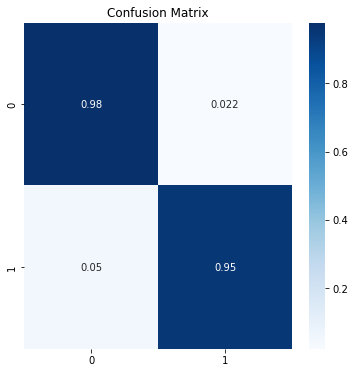

In [ ]:
predicted_y2 = model2.predict(x_test)
print("Accuracy Score of KNN CLassifier with n_neighbour = 85 is {}".format(accuracy_score(predicted_y2 , y_test)))      ## accuracy_score
print("F1 Score of KNN CLassifier is {}".format(f1_score(predicted_y2 , y_test)))                                        ## f1_score
confusion = confusion_matrix(predicted_y2 , y_test , normalize = 'true')                                                 ## confusion_matrix
plt.figure(figsize = (6,6))
sns.heatmap(confusion, annot=True, cmap='Blues')
plt.title('Confusion Matrix')

Observation:
* Accuracy_score for KNN Classifier when n_neighbors = 85 is 0.96.
* F1_score for KNN Classifier is 0.95
* In confusion matrix we can see that we have 0.053 and 0.019 falsely classified values

<b> Naive Byes

Let's train a Naive Bayes on our dataset

In [ ]:
clf2 = GaussianNB()                                                      ### naive bayes
clf2.fit(x_train , y_train)
predicted_y2 = clf2.predict(x_test) 

Performance metrices for Naive Bayes

Accuracy Score of NB CLassifier is 0.8630022744503412
F1 Score of NB CLassifier is 0.8390487218312996


Text(0.5, 1.0, 'Confusion Matrix')

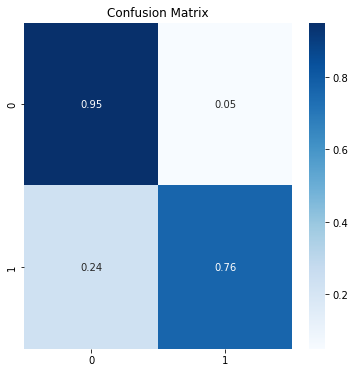

In [ ]:
predicted_y2 = clf2.predict(x_test)
print("Accuracy Score of NB CLassifier is {}".format(accuracy_score(predicted_y2 , y_test)))
print("F1 Score of NB CLassifier is {}".format(f1_score(predicted_y2 , y_test)))
confusion = confusion_matrix(predicted_y2 , y_test , normalize = 'true')
plt.figure(figsize = (6,6))
sns.heatmap(confusion, annot=True, cmap='Blues')
plt.title('Confusion Matrix')

Observation:
* As the performance of a naive bayes model decreses with increase in dimension of dataset the accuracy_score for Naive Bayes is 0.86.
* F1_score for Naive Bayes is 0.83
* In confusion matrix we can see that we have 0.24 and 0.05 falsely classified values

<b> Logistic regression

Let's train a Logistic Regression model.

In [ ]:
clf3 = LogisticRegression()                                                    ### logistic regression
clf3.fit(x_train,y_train)
predicted_y3 = clf3.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Performance metrices

Accuracy Score of LR CLassifier is 0.9603487490523124
F1 Score of LR CLassifier is 0.9486096099046869


Text(0.5, 1.0, 'Confusion Matrix')

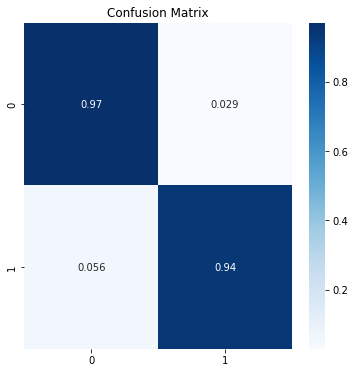

In [ ]:
predicted_y3 = clf3.predict(x_test)
print("Accuracy Score of LR CLassifier is {}".format(accuracy_score(predicted_y3 , y_test)))
print("F1 Score of LR CLassifier is {}".format(f1_score(predicted_y3 , y_test)))
confusion = confusion_matrix(predicted_y3 , y_test , normalize = 'true')
plt.figure(figsize = (6,6))
sns.heatmap(confusion, annot=True, cmap='Blues')
plt.title('Confusion Matrix')

Observation:
* Accuracy_score for Logistic Regression is 0.96.
* F1_score for Logistic Regression is 0.94
* In confusion matrix we can see that we have 0.056 and 0.029 falsely classified values

<b> Support Vector Classifier

Training a support vector classifier

In [ ]:
clf4 = SVC()                                                                          ### support vector classifier
clf4.fit(x_train , y_train)
predicted_y4 = clf4.predict(x_test)

Performance Metrices

Accuracy Score of SVM CLassifier is 0.9648976497346474
F1 Score of SVM CLassifier is 0.9542444905623085


Text(0.5, 1.0, 'Confusion Matrix')

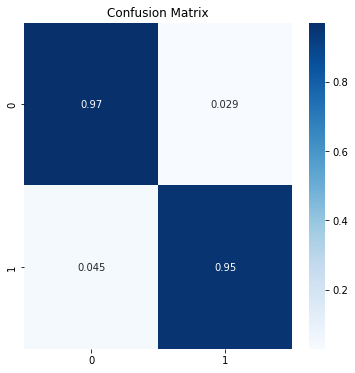

In [ ]:
predicted_y4 = clf4.predict(x_test)
print("Accuracy Score of SVM CLassifier is {}".format(accuracy_score(predicted_y4 , y_test)))
print("F1 Score of SVM CLassifier is {}".format(f1_score(predicted_y4 , y_test)))
confusion = confusion_matrix(predicted_y4 , y_test , normalize = 'true')
plt.figure(figsize = (6,6))
sns.heatmap(confusion, annot=True, cmap='Blues')
plt.title('Confusion Matrix')

Observation:
* Accuracy_score for SVClassifier is 0.964.
* F1_score for SVClassifier is 0.954
* In confusion matrix we can see that we have 0.045 and 0.029 falsely classified values

<b> Decision Tree

Training conditional Model Decision Tree

In [ ]:
clf5 = DecisionTreeClassifier()                                                                      ## DT Classifier
clf5.fit(x_train , y_train)
cross_validation_score = cross_val_score(clf5 , x_train , y_train ,cv =10)                         ### performing 10 fold cross validation
print(cross_validation_score)

[0.95147839 0.95356331 0.95413192 0.95242608 0.95489007 0.95185747
 0.95526914 0.95450237 0.9543128  0.95696682]


Performance Metrices

Accuracy Score of DT CLassifier is 0.9538286580742987
F1 Score of DT CLassifier is 0.9400767489914396


Text(0.5, 1.0, 'Confusion Matrix')

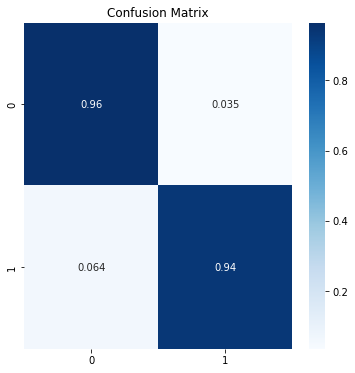

In [ ]:
predicted_y5 = clf5.predict(x_test)
print("Accuracy Score of DT CLassifier is {}".format(accuracy_score(predicted_y5 , y_test)))
print("F1 Score of DT CLassifier is {}".format(f1_score(predicted_y5 , y_test)))
confusion = confusion_matrix(predicted_y5 , y_test , normalize = 'true')
plt.figure(figsize = (6,6))
sns.heatmap(confusion, annot=True, cmap='Blues')
plt.title('Confusion Matrix')

Observation:
* Accuracy_score for DT Classifier is 0.95.
* F1_score for DT Classifier is 0.94
* In confusion matrix we can see that we have 0.064 and 0.035 falsely classified values

<b> Random Forest

Training an ensemble model random forest

In [59]:
clf6 = RandomForestClassifier()                                      ### random forest regression model
clf6.fit(x_train , y_train)                                                     
cross_validation_score = cross_val_score(clf6 , x_train , y_train ,cv = 10)           ### ten fold cross validation
print(cross_validation_score)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packag

[0.96683093 0.96986353 0.9711903  0.96739955 0.96853677 0.9711903
 0.96626232 0.96909953 0.96796209 0.97042654]


Performance Metrices

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


Accuracy Score of RF CLassifier is 0.9729340409401062
F1 Score of RF CLassifier is 0.9659643435980552


Text(0.5, 1.0, 'Confusion Matrix')

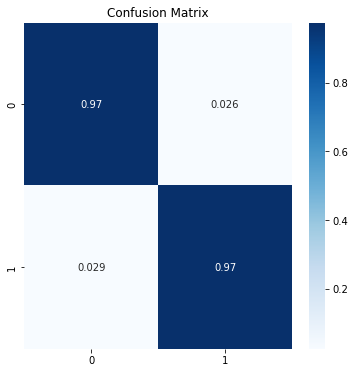

In [60]:
predicted_y6 = clf6.predict(x_test)
print("Accuracy Score of RF CLassifier is {}".format(accuracy_score(predicted_y6 , y_test)))
print("F1 Score of RF CLassifier is {}".format(f1_score(predicted_y6 , y_test)))
confusion = confusion_matrix(predicted_y6 , y_test , normalize = 'true')
plt.figure(figsize = (6,6))
sns.heatmap(confusion, annot=True, cmap='Blues')
plt.title('Confusion Matrix')

Observation:
* Accuracy_score for RF Classifier is 0.968.
* F1_score for RF Classifier is 0.959
* In confusion matrix we can see that we have 0.038 and 0.027 falsely classified values

<b> GradientBoosting Classifier

Training another ensemble model Gradient Boosting Classifier

In [ ]:
clf7 = GradientBoostingClassifier()                                      ### random forest regression model
clf7.fit(x_train , y_train)                                                     
cross_validation_score = cross_val_score(clf7 , x_train , y_train ,cv = 10)           ### ten fold cross validation
print(cross_validation_score)

[0.96550417 0.96645186 0.96739955 0.96702047 0.96834723 0.96341926
 0.96171342 0.96872038 0.96398104 0.96492891]


Performance Metrices

Accuracy Score of GBDT CLassifier is 0.9630780894617135
F1 Score of GBDT CLassifier is 0.9519771225717385


Text(0.5, 1.0, 'Confusion Matrix')

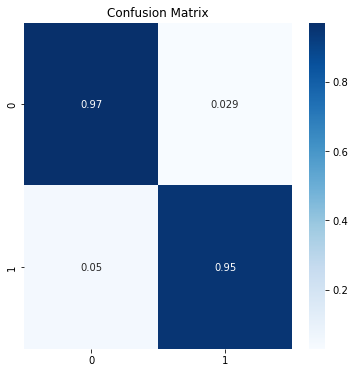

In [ ]:
predicted_y7 = clf7.predict(x_test)
print("Accuracy Score of GBDT CLassifier is {}".format(accuracy_score(predicted_y7 , y_test)))
print("F1 Score of GBDT CLassifier is {}".format(f1_score(predicted_y7 , y_test)))
confusion = confusion_matrix(predicted_y7 , y_test , normalize = 'true')
plt.figure(figsize = (6,6))
sns.heatmap(confusion, annot=True, cmap='Blues')
plt.title('Confusion Matrix')

Observation:
* Accuracy_score for GBDT Classifier is 0.963.
* F1_score for GBDT Classifier is 0.951
* In confusion matrix we can see that we have 0.05 and 0.029 falsely classified values

> Feature Importance

In [61]:
feature_importance_df = pd.DataFrame({'features':x_train.columns , 'importance':clf6.feature_importances_}).reset_index(None)

In [62]:
feature_importance_df.sort_values(by= 'importance' , ascending = 'True' , inplace = True)

In [63]:
top_ten_important_features = feature_importance_df.tail(10)

In [64]:
top_ten_important_features

,index,features,importance
442,442,"(never,)",0.014262
637,637,"(told,)",0.018581
316,316,"(good,)",0.022776
6,6,entertainment,0.025223
7,7,ground_service,0.029758
4,4,cabin_service,0.054440
3,3,seat_comfort,0.062817
5,5,food_bev,0.096087
0,0,overall,0.129612
8,8,value_for_money,0.138067


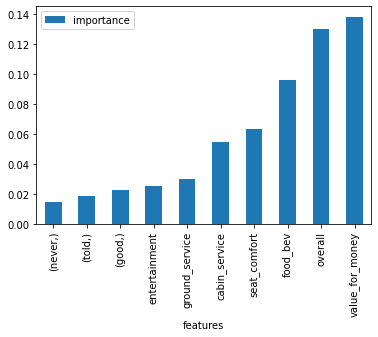

In [70]:
top_ten_important_features.plot(kind = 'bar' , x = 'features' , y = 'importance')

<b> Final Conclusion:
* The best model we could get is Random Forest classifier which has a accuracy score of 0.968 and F1 score of 0.959